## **4- Régression sur la variable "Price" :**


a. Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible.


b. Prétraiter les données : choisir les variables explicatives (essayer plusieurs sélections), procéder à l'imputation des valeurs manquantes (tester plusieurs stratégies), normaliser les variables, etc.


c. Appliquer les différents algorithmes étudiés en cours. Pour chacun d'eux on procèdera ainsi : définition d'un dictionnaire d'hyperparamètres, recherche exhaustive (ou aléatoire) des meilleurs hyperparamètres, calculs des différentes métriques (MSE, MAE, etc.).


d. Comparer les différents algorithmes.

In [51]:
# Imports

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
import seaborn as sns
import joblib
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import FunctionTransformer
from sklearn.impute import KNNImputer



### a. Analyse

In [52]:
df = pd.read_csv("df_analysis.csv")

bin_variables = ["Gender", "Customer Type", "Type of Travel" ]
num_variables = [ "Leg room service", "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Inflight service", "Inflight wifi service", "On-board service", "Checkin service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Baggage handling", "Seat comfort", "Inflight entertainment", "Cleanliness"]
ord_variables = ["Class"]
targets= ["satisfaction", "Price", "bin_satisfaction"]

#Just for visualization
cat_variables= ["Gender", "Customer Type", "Type of Travel", "Leg room service", "Inflight wifi service", "Inflight service", "Departure/Arrival time convenient", "Ease of Online booking", "On-board service", "Checkin service", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "Baggage handling", "Cleanliness", "Class"]

#### Variables explicatives catégorielles en fonction de la target "Price"

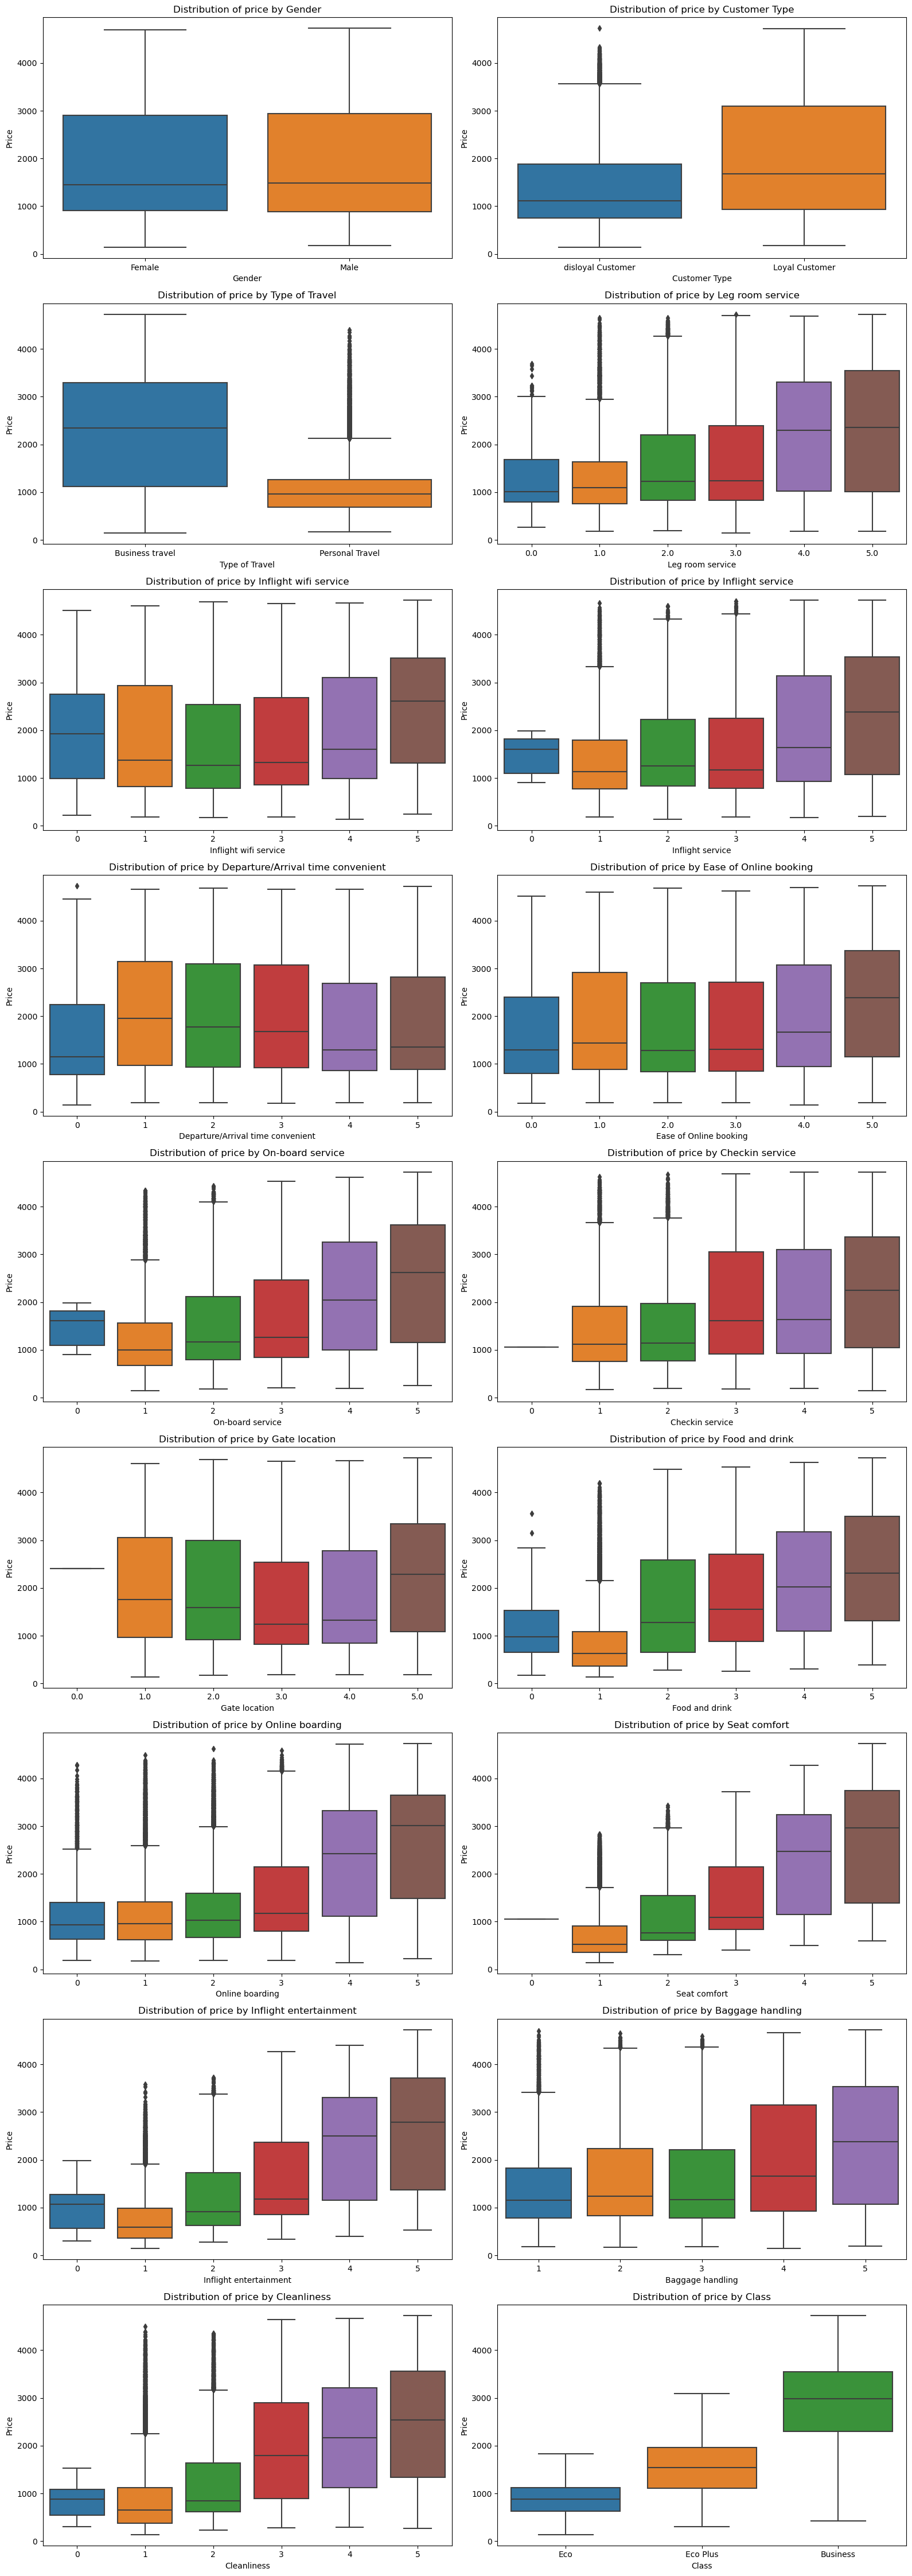

In [53]:
cat_variables= ["Gender", "Customer Type", "Type of Travel", "Leg room service", "Inflight wifi service", "Inflight service", "Departure/Arrival time convenient", "Ease of Online booking", "On-board service", "Checkin service", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "Baggage handling", "Cleanliness", "Class"]

n_cols = 2
n_rows = (len(cat_variables) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(8 * n_cols, 5 * n_rows))  # Ajuster la taille de la figure

for i, var in enumerate(cat_variables):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=var, y='Price', data=df)
    plt.title(f'Distribution of price by {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

- les hommes et les femmes n'ont pas de différence significative de prix des billets,
- les "loyal customer" ont tendance à acheter un peu plus cher leurs billets,
- les voyages professionnels ont une médiane de prix plus importante que les voyages personnels,
- globalement, plus le client a payé cher sont billet, plus la satisfaction est au rendez-vous même si certains services ne semblent pas totalement les satisfaire ( "Inflight wifi", "Inflight service", "On-board service", "Gate location")
- plus le client paie cher son billet, meilleure est sa classe

#### Variables explicatives numériques en fonction du "Price"

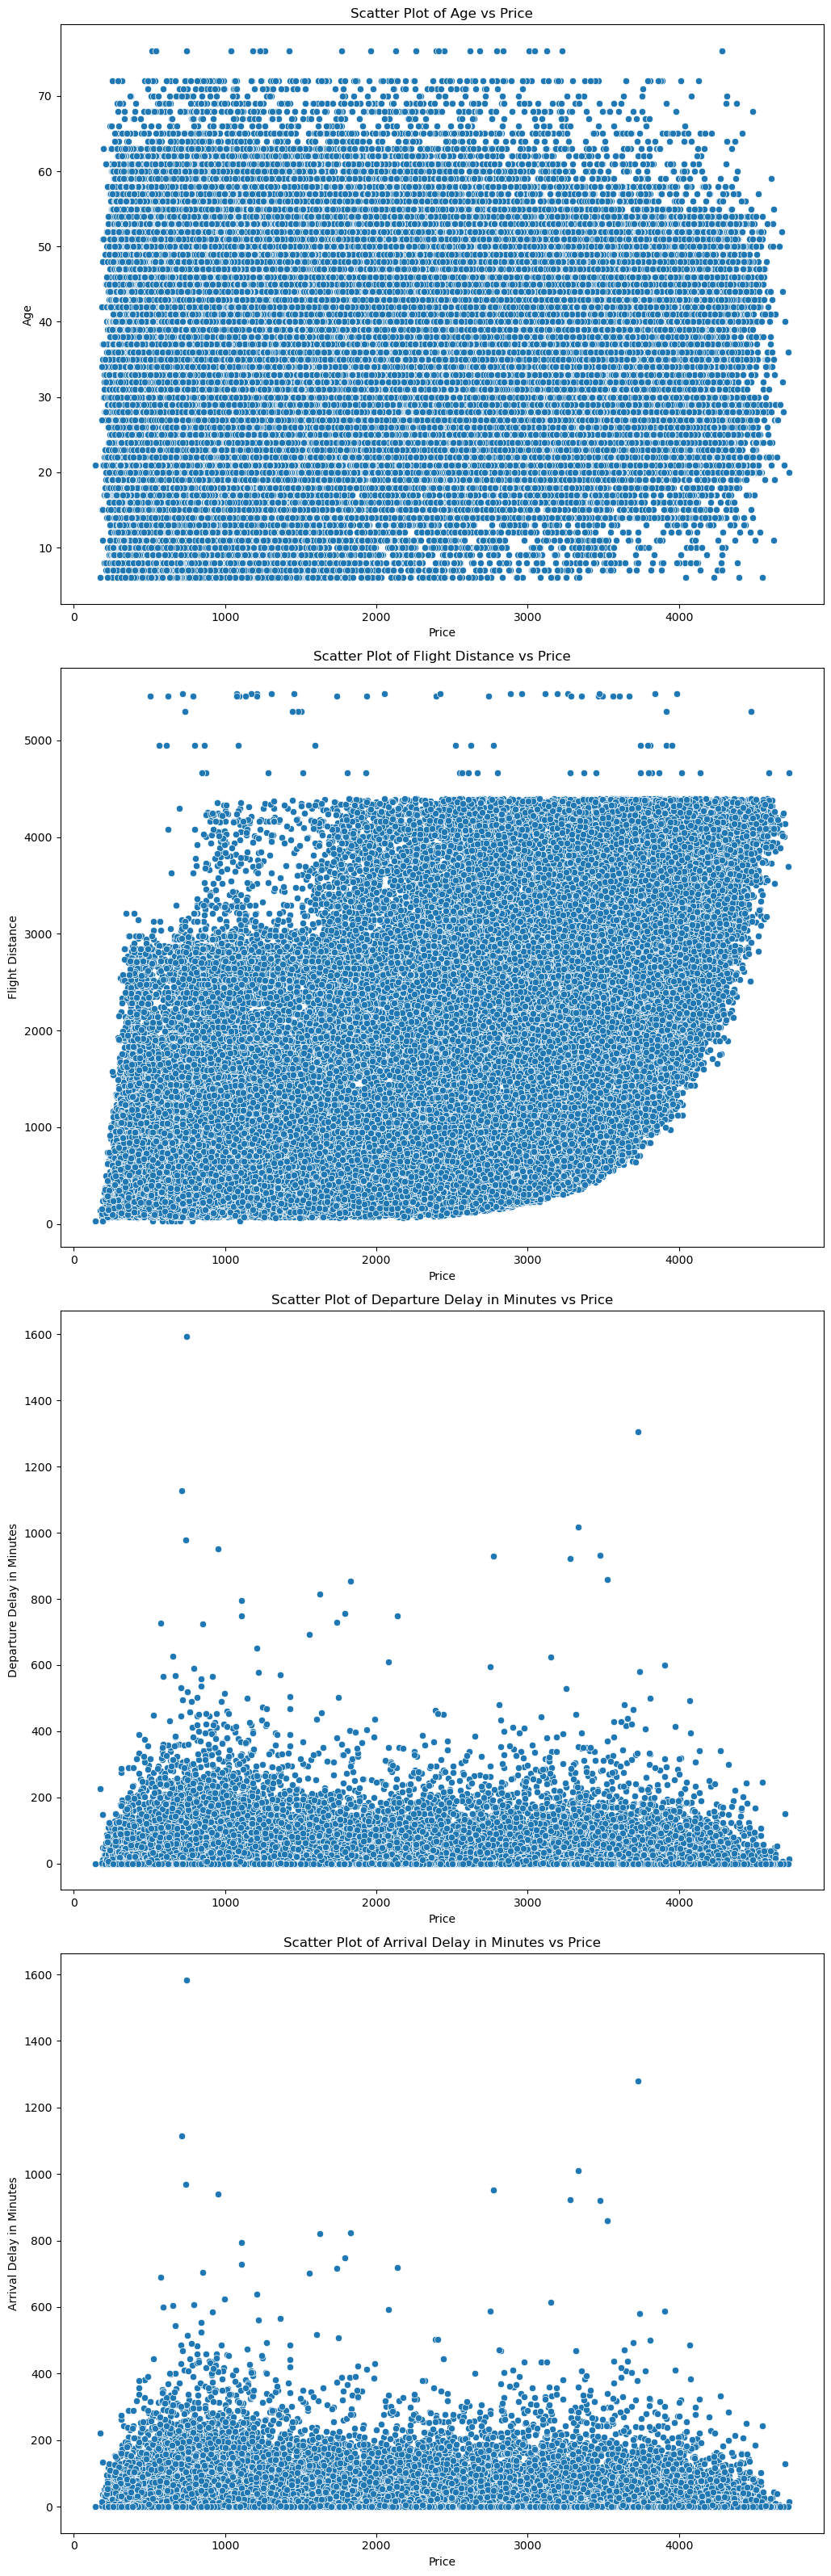

In [54]:
no_cat_variables = [
    col for col in df.columns 
    if col not in cat_variables and col not in targets
]

n_cols = 2  # Deux colonnes: une pour le scatter plot et une pour le boxplot
n_rows = len(no_cat_variables)  # Une ligne pour chaque variable numérique

plt.figure(figsize=(10 * n_cols, 8 * n_rows))  # Ajustement de la taille pour mieux s'adapter aux deux types de plots

for i, col in enumerate(no_cat_variables):
    # Tracé des nuages de points pour chaque variable numérique vs Price
    plt.subplot(n_rows, n_cols, 2 * i + 1)  # Position pour le scatter plot
    sns.scatterplot(x=df['Price'], y=df[col])
    plt.title(f'Scatter Plot of {col} vs Price')
    plt.xlabel('Price')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- On remarque que les gens achetant des billets vraiment excessifs ont un âge généralement compris entre 20 et 55 ans.
- Plus la distance de vol est grande, plus le billet coute cher. le prix semble être plafonné à 4500 unités.

#### Lien avec la satisfaction (bin_satisfaction)

/var/folders/1k/1sj3zxpx1x78x8blphwrrcrc0000gn/T/ipykernel_80441/3214597377.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['bin_satisfaction'] == 0][col], label='Dissatified or neutral', shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/1k/1sj3zxpx1x78x8blphwrrcrc0000gn/T/ipykernel_80441/3214597377.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['bin_satisfaction'] == 1][col], label='Satisfied', shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119

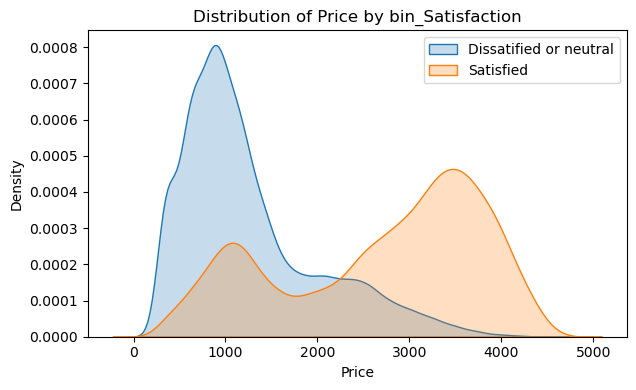

In [55]:

n_cols = 2
n_rows = (len(["Price"]) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(["Price"]):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.kdeplot(data=df[df['bin_satisfaction'] == 0][col], label='Dissatified or neutral', shade=True)
    sns.kdeplot(data=df[df['bin_satisfaction'] == 1][col], label='Satisfied', shade=True)
    plt.title(f'Distribution of {col} by bin_Satisfaction')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

Visiblement, plus un client paie cher son billet, plus il est satisfait.

### b. Prétraitement

In [56]:
df = pd.read_csv("project.csv")

#### Supprimer les colonnes inutiles

In [57]:
variables_to_remove = ["Unnamed: 0", "id"]

df = df.drop(variables_to_remove, axis=1)

df.dtypes

Gender                                object
Customer Type                         object
Age                                  float64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking               float64
Gate location                        float64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                     float64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

#### Nombre de valeurs nulles

In [58]:
print("🚀 ~ df:")
print(df.shape)
print("null_values:", df.isnull().values.sum())
print("null_values by column:", df.isnull().sum())

# print(df.head)

🚀 ~ df:
(129880, 24)
null_values: 913
null_values by column: Gender                                 0
Customer Type                          0
Age                                  126
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking               131
Gate location                        130
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                     133
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                         

Il faudra faire une imputation.

#### Formater les variables binaires (pipeline)
Comme elles ne sont pas sous la forme d'un boolean, on remplace chacune des 2 valeurs par 0 ou 1.

In [59]:
def set_bin_num(df):
    # Création d'un nouveau DataFrame pour les résultats
    result = df.copy()
    conditions = [
        (df['Gender'] == "Male") | (df['Customer Type'] == "disloyal Customer") | (df['Type of Travel'] == "Personal Travel")
    ]
    # Utiliser np.select pour assigner 0 ou 1 selon les conditions
    result['Gender'] = np.select(conditions, [0], default=1)
    result['Customer Type'] = np.select(conditions, [0], default=1)
    result['Type of Travel'] = np.select(conditions, [0], default=1)
    
    return result[['Gender', 'Customer Type', 'Type of Travel']]


In [60]:
bin_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", FunctionTransformer(set_bin_num, validate=False))
    ]
)

#### Formater les variables ordinales (pipeline)

In [61]:
# Transforme les strings en nombres qui sont ordonnés entre eux

satisfaction_pipeline = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("satisfaction_encoder", OrdinalEncoder(categories=[["dissatisfied", "neutral", "satisfied"]]))
])

class_pipeline = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("class_encoder", OrdinalEncoder(categories=[["Eco", "Eco Plus", "Business"]])),
])

#### Formater les variables numériques (pipeline)
Comme les variables numériques ne suivent pas une loi normale, on doit normaliser avec le min et le max (et non avec le standardScaler)

In [62]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns, factor = 1.5, remove=True):
        self.columns = columns
        self.factor = factor
        self.remove = remove
        self.kept_indices = None
        
    def remove_outliers(self, X):
        l = []
        for c in self.columns:
            Q1 = X[c].quantile(0.25)
            Q3 = X[c].quantile(0.75)
            delta = Q3-Q1
            lower_bound = Q1 - self.factor*delta
            upper_bound = Q3 + self.factor*delta
            column = X[c].loc[ ( (X[c] >= lower_bound) & (X[c] <= upper_bound) )  ]
            l.append( pd.Series(column) )
            
        res = pd.concat(l, axis=1, join = "inner")
        
        self.kept_indices = res.index
        
        return X.loc[self.kept_indices]
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.remove:
            return self.remove_outliers(X)
        else:
            self.kept_indices = X.index
            return X

outlier_pipeline = Pipeline(steps = [("outliers", OutlierRemover(columns=df.drop(columns='Price', axis=1).columns, factor=1.5, remove=False))])

In [63]:
num_pipeline = Pipeline(steps=[
  ('imputer', KNNImputer()),
  ("scaler", MinMaxScaler())
])

#### Définition de la pipeline dans l'ordre

In [64]:
preprocessor = ColumnTransformer(transformers=[
    ("class", class_pipeline, ["Class"]),
    ("satisfaction", satisfaction_pipeline, ["satisfaction"]),
    ("bin", bin_pipeline, bin_variables),
    ("num", num_pipeline, num_variables)
], remainder="passthrough", verbose_feature_names_out=False)

preprocessor.set_output(transform='pandas')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('class',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('class_encoder',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]))]),
                                 ['Class']),
                                ('satisfaction',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('satisfaction_encoder',
                                                  OrdinalEncoder(cat...
                                 ['Leg room service', 'Age', 'Flight Distance',
                                  'Departure Delay in Minutes',
                                  'Arrival Delay in Minutes',
                                  'Inflight service', 'Inflight wifi service',
                                  'On-board service', 'Checkin service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Baggage handling', 'Seat comfort',
                                  'Inflight entertainment', 'Cleanliness'])],
                  verbose_feature_names_out=False)

In [65]:
pipeline = Pipeline([
    ("outlier_remover", outlier_pipeline),
    ("preprocessor", preprocessor)
])

df_clean = pipeline.fit_transform(df)

#### Découpage du dataset en datasets d'entrainement et de test

In [66]:
X = df_clean.drop(["Price"], axis=1)
y = df_clean["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=314)

### c. Appliquer les différents algorithmes étudiés en cours. Pour chacun d'eux on procèdera ainsi : définition d'un dictionnaire d'hyperparamètres, recherche exhaustive (ou aléatoire) des meilleurs hyperparamètres, calculs des différentes métriques (MSE, MAE, etc.). **Entrainement**

In [67]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Définition du dictionnaire d'hyperparamètres
models_dict = [
    {"type": LinearRegression(), "hyperparameters": []}, # spécifique à la régression linéaire
    {"type": KNeighborsRegressor(), "hyperparameters": []}, # spécifique à la régression non linéaire
    {"type": KNeighborsRegressor(), "hyperparameters": [{"n_neighbors" : [3, 5, 10], "weights" : ["uniform", "distance"]}]},
    {"type": Ridge(), "hyperparameters": []},# spécifique à la régression linéaire
    {"type": Ridge(), "hyperparameters": [{"alpha": [0.1, 1.0, 10.0]}]},
    {"type": Lasso(), "hyperparameters": []}, # spécifique à la régression linéaire
    {"type": Lasso(), "hyperparameters": [{"alpha": [0.1, 1.0, 10.0]}]},
    {"type": RandomForestRegressor(), "hyperparameters": []},
    {"type": RandomForestRegressor(), "hyperparameters": {"n_estimators": [10, 50, 100], "max_features": ["auto", "sqrt", "log2"]}},
    {"type": SVR(), "hyperparameters": []}, # spécifique à la régression 
    {"type": SVR(), "hyperparameters": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}},
    {"type": GradientBoostingRegressor(), "hyperparameters": []},# spécifique à la régression
    {"type": GradientBoostingRegressor(), "hyperparameters": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}},
]

# Initialiser le dictionnaire pour les scores
model_scores = {}

for model in models_dict:
    classifier = model["type"]
    best_params = {}
    model_name = f"{type(classifier).__name__}"
    print("🚀 ~ model_name:", model_name)

    if not model["hyperparameters"]:
        # Essai avec le modèle pur
        classifier.fit(X_train.values, y_train.values.ravel())
        y_pred = classifier.predict(X_test.values)
    else:
        # Recherche des meilleurs hyperparamètres
        model_name += "_gscv"
        hyperparameters = model["hyperparameters"]
        gscv_model = GridSearchCV(
            estimator=classifier,
            param_grid=hyperparameters,
            cv=5,
            scoring="neg_mean_squared_error",
        )
        gscv_model.fit(X_train.values, y_train.values.ravel())
        y_pred = gscv_model.predict(X_test.values)
        best_params = gscv_model.best_params_
    
    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Stocker les métriques
    model_scores[model_name] = {
        "MSE": mse, # Mean Squared Error: moyenne des carrés des erreurs, c'est-à-dire la différence carrée entre les valeurs observées et les valeurs prédites. / valeur de MSE plus petite indique une meilleure performance du modèle. La MSE est sensible aux outliers car elle élève les erreurs au carré.
        "R2": r2, # coefficient de détermination: mesure la proportion de la variance dans la variable dépendante qui est prévisible à partir des variables indépendantes / varie entre 0 et 1. Un R² proche de 1 indique que le modèle explique une grande partie de la variance observée
        "MAE": mae, # Mean Absolute Error: moyenne des erreurs absolues, c'est-à-dire la différence absolue entre les valeurs observées et les valeurs prédites. / MAE plus petite indique une meilleure performance. Cependant, la MAE est moins sensible aux outliers car elle n'élève pas les erreurs au carré.
        "best_params": best_params
    }

    print(f"{model_name}: MSE={mse}, R2={r2}, MAE={mae}")


🚀 ~ model_name: LinearRegression
LinearRegression: MSE=67515.1138688386, R2=0.9498304250551978, MAE=206.9618462264634
🚀 ~ model_name: KNeighborsRegressor
KNeighborsRegressor: MSE=32676.063652602403, R2=0.9757188556697821, MAE=129.24781336618418
🚀 ~ model_name: KNeighborsRegressor
KNeighborsRegressor_gscv: MSE=31085.405921758203, R2=0.9769008520801584, MAE=126.0018902502293
🚀 ~ model_name: Ridge
Ridge: MSE=67518.34393292373, R2=0.9498280248379292, MAE=206.97969378619837
🚀 ~ model_name: Ridge
Ridge_gscv: MSE=67518.34393292373, R2=0.9498280248379292, MAE=206.97969378619837
🚀 ~ model_name: Lasso
Lasso: MSE=67682.21362999926, R2=0.9497062554654508, MAE=207.33249152586748
🚀 ~ model_name: Lasso
Lasso_gscv: MSE=67527.09531717408, R2=0.9498215218017517, MAE=207.01121683975978
🚀 ~ model_name: RandomForestRegressor
RandomForestRegressor: MSE=4138.867230770712, R2=0.9969244633116648, MAE=46.23655489682784
🚀 ~ model_name: RandomForestRegressor


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-pack

RandomForestRegressor_gscv: MSE=8607.711393608097, R2=0.9936037251939797, MAE=65.5576243327174
🚀 ~ model_name: SVR
SVR: MSE=44232.733366208486, R2=0.9671312495163592, MAE=145.37835795091655
🚀 ~ model_name: SVR
SVR_gscv: MSE=13788.346797767206, R2=0.9897540645583539, MAE=79.59635476310916
🚀 ~ model_name: GradientBoostingRegressor
GradientBoostingRegressor: MSE=5652.417370110635, R2=0.9957997645176163, MAE=54.286290340055594
🚀 ~ model_name: GradientBoostingRegressor
GradientBoostingRegressor_gscv: MSE=3323.240735372059, R2=0.9975305444132588, MAE=41.826231857940925


In [68]:
for model_name, model_info in model_scores.items():
    print("Name: ", model_name)
    print("--> best_params: ", model_info['best_params'])
    print("--> MSE: ", model_info['MSE'])
    print("--> R2: ", model_info['R2'])
    print("--> MAE: ", model_info['MAE'])
    print("---------------------------------------")


Name:  LinearRegression
--> best_params:  {}
--> MSE:  67515.1138688386
--> R2:  0.9498304250551978
--> MAE:  206.9618462264634
---------------------------------------
Name:  KNeighborsRegressor
--> best_params:  {}
--> MSE:  32676.063652602403
--> R2:  0.9757188556697821
--> MAE:  129.24781336618418
---------------------------------------
Name:  KNeighborsRegressor_gscv
--> best_params:  {'n_neighbors': 10, 'weights': 'distance'}
--> MSE:  31085.405921758203
--> R2:  0.9769008520801584
--> MAE:  126.0018902502293
---------------------------------------
Name:  Ridge
--> best_params:  {}
--> MSE:  67518.34393292373
--> R2:  0.9498280248379292
--> MAE:  206.97969378619837
---------------------------------------
Name:  Ridge_gscv
--> best_params:  {'alpha': 1.0}
--> MSE:  67518.34393292373
--> R2:  0.9498280248379292
--> MAE:  206.97969378619837
---------------------------------------
Name:  Lasso
--> best_params:  {}
--> MSE:  67682.21362999926
--> R2:  0.9497062554654508
--> MAE:  207.3

### d. Comparer les différents algorithmes.

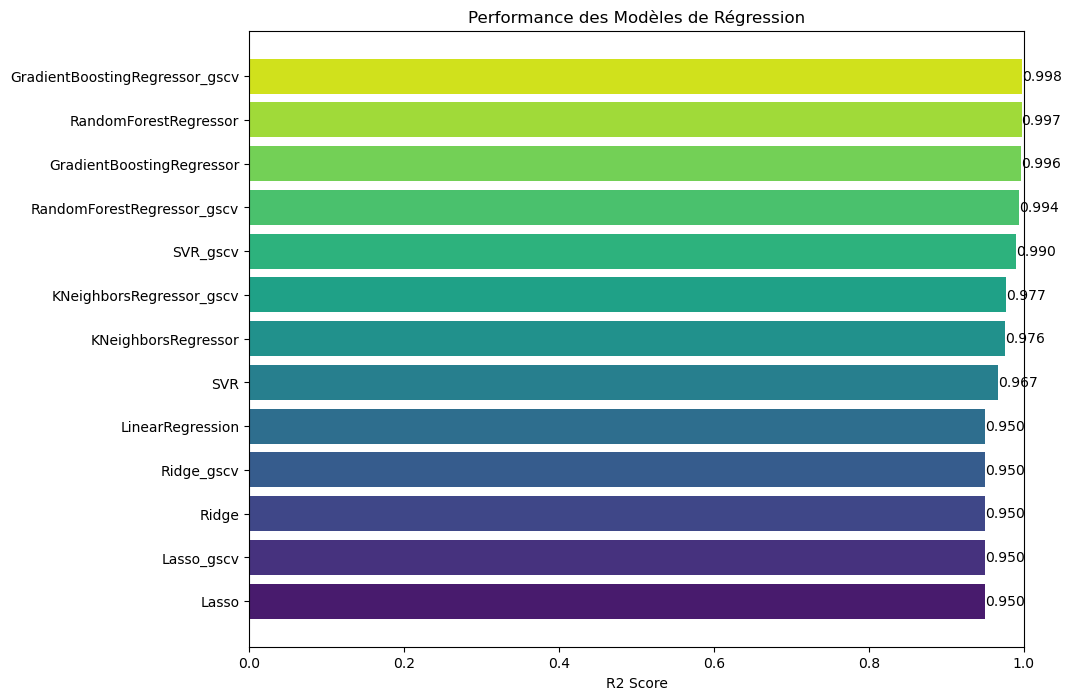

In [69]:
# Tri du dictionnaire par score R2, en supposant que chaque valeur est un dictionnaire contenant un score 'R2'
sorted_scores = dict(sorted(model_scores.items(), key=lambda item: item[1]['R2']))

colors = sns.color_palette('viridis', len(sorted_scores))

# Tracer le graphique
plt.figure(figsize=(10, 8))
# Note: il faut extraire les scores R2 pour les passer à la fonction barh
bars = plt.barh(list(sorted_scores.keys()), [value['R2'] for value in sorted_scores.values()], color=colors)
plt.xlabel('R2 Score')
plt.title('Performance des Modèles de Régression')
plt.xlim(0, 1)  # Limiter l'axe des x pour mieux visualiser les scores R2

# Ajouter les valeurs exactes sur les barres
for bar in bars:
    plt.text(bar.get_width(),  # Position horizontale, un peu à droite de la fin de la barre
             bar.get_y() + bar.get_height() / 2,  # Position verticale, au centre de la barre
             f'{bar.get_width():.3f}',  # Texte avec 2 décimales
             va='center',  # Alignement vertical au centre
             ha='left')  # Alignement horizontal à gauche pour que le texte suive la barre

plt.show()
